In [2]:
import os
os.chdir("/Users/evanrootness/Project1/ProjectTwo")
pwd = os.getcwd()
print(pwd)

/Users/evanrootness/Project1/ProjectTwo


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys  

In [4]:
import_data = pd.read_csv(pwd + '/data/DATA (1).csv')
raw_data = import_data.copy()

In [5]:

# test = pd.read_csv('/kaggle/input/titanic/test.csv')

# training['train_test'] = 1
# test['train_test'] = 0
# test['Survived'] = np.NaN
# all_data = pd.concat([training,test])
# all_data.columns

# Data Exploration

In [6]:
print(raw_data.shape)
raw_data

(145, 33)


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [7]:
raw_data.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


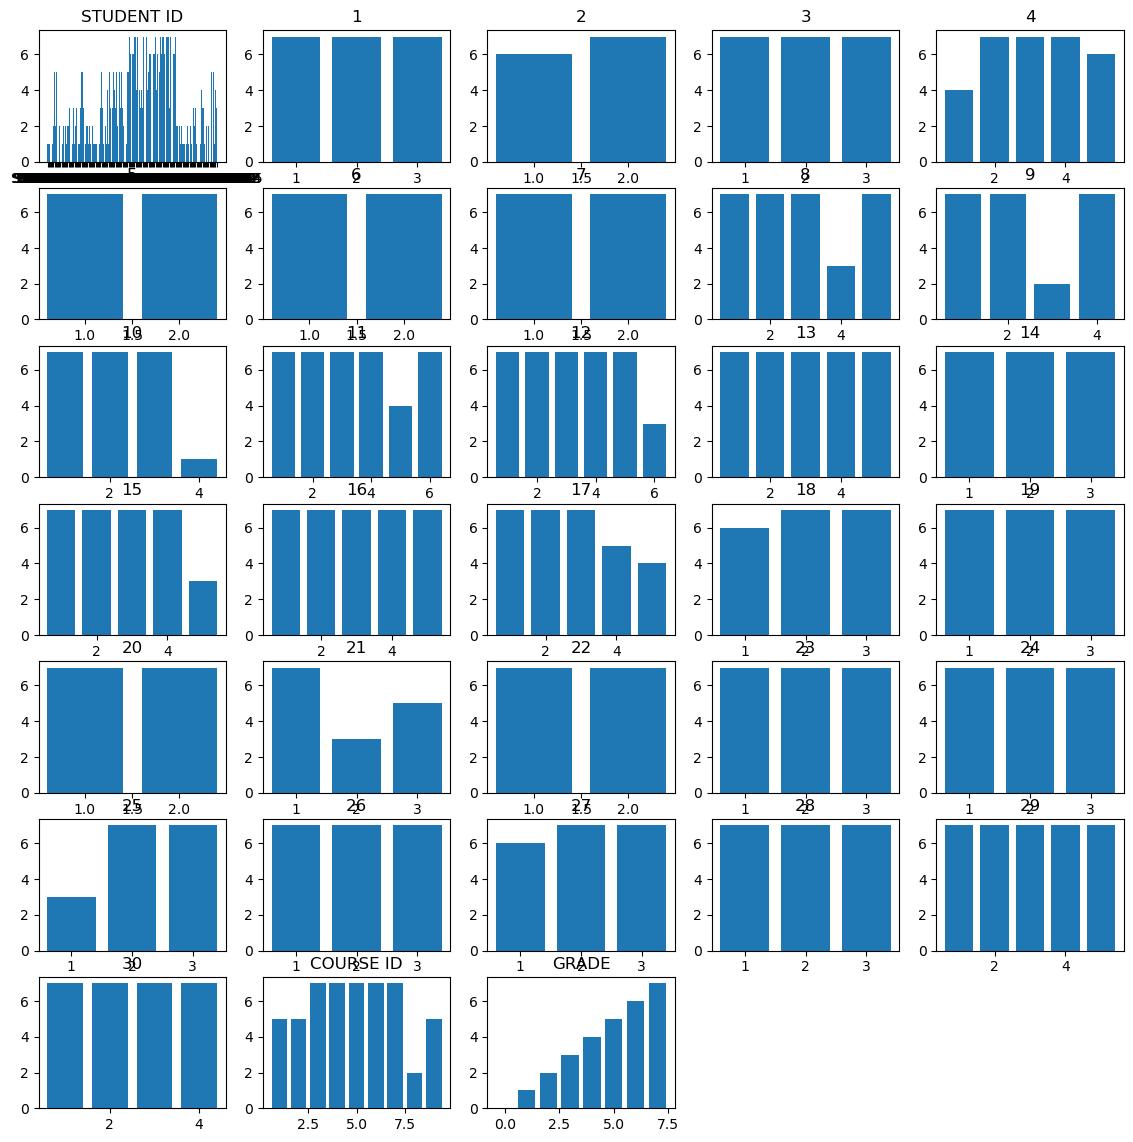

In [48]:
# distributions for all numeric variables 
length_df_num = len(raw_data.iloc[0, :])
width = 5
height = math.ceil(length_df_num / width)
row = 1
row_index = 0
column_index = 0
plt.figure(figsize = (14, 14))
for i in raw_data.columns:
    ax = plt.subplot2grid((height, width), (row_index, column_index))
    ax.bar(raw_data[i], height=raw_data['GRADE'])
    # ax.hist(raw_data[i])
    ax.set_title(i)
    if ((column_index + 1) % width == 0): #0, 1, 2, 3      4, 5, 6, 7
        row_index += 1
        column_index = 0
    else:
        column_index += 1

<Axes: >

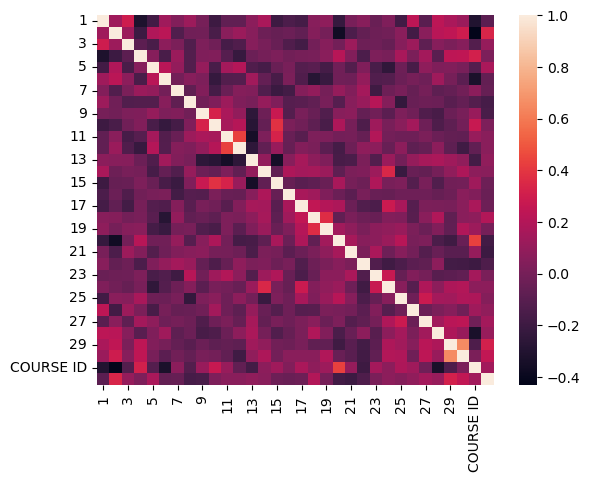

In [10]:
sns.heatmap(raw_data.iloc[:, 1:].corr())

<BarContainer object of 2 artists>

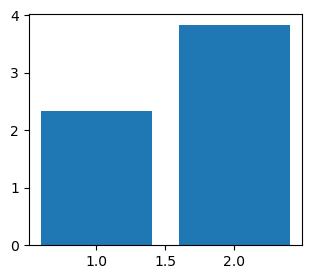

In [13]:
female_avg = raw_data.query("`2` == 1").loc[:, 'GRADE'].mean()
male_avg = raw_data.query("`2` == 2").loc[:, 'GRADE'].mean()
plt.figure(figsize = (12, 3))
ax = plt.subplot(131)
plt.bar(x = np.arange(1, 3), height = [female_avg, male_avg])

[2.40740741 3.32323232 3.89473684]


<BarContainer object of 3 artists>

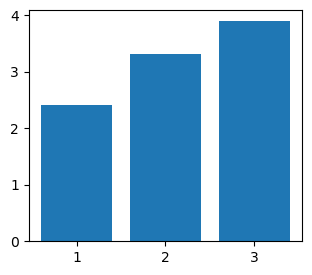

In [14]:
def avg_grades_one_column(data, column, num_choices):
    array = np.array([])
    for i in np.arange(num_choices):
        array = np.append(array, data.query(f"`{column}` == {i + 1}").loc[:, 'GRADE'].mean())
    return array

# 18 reading freq non-scientific
avg_grades_read_nonsci = avg_grades_one_column(raw_data, 18, 3)
print(avg_grades_read_nonsci)

plt.figure(figsize = (12, 3))
ax = plt.subplot(131)
plt.bar(x = np.arange(1, len(avg_grades_read_nonsci) + 1), height = avg_grades_read_nonsci)

In [18]:
sys.path.insert(1, '/Users/evanrootness/Project1/ProjectTwo/py_scripts/')
import explore

['/Users/evanrootness/Project1/ProjectTwo/notebooks_exploration', '/Users/evanrootness/Project1/ProjectTwo/py_scripts/', '/Users/evanrootness/anaconda3/lib/python311.zip', '/Users/evanrootness/anaconda3/lib/python3.11', '/Users/evanrootness/anaconda3/lib/python3.11/lib-dynload', '', '/Users/evanrootness/anaconda3/lib/python3.11/site-packages', '/Users/evanrootness/anaconda3/lib/python3.11/site-packages/aeosa']


In [77]:
raw_data.query('`27` == 1').loc[:, "GRADE"]

0      1
2      1
5      2
67     1
80     4
108    6
113    1
114    2
121    0
Name: GRADE, dtype: int64

[2.28787879 3.         6.125      4.5        5.28571429]


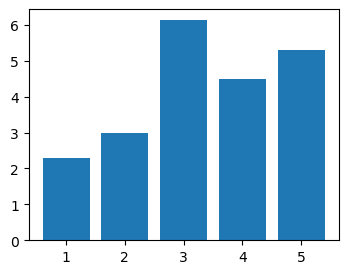

In [86]:
test_corr = explore.avg_grades_one_column(raw_data, 'COURSE ID', 5)
plt.figure(figsize = (4, 3))
plt.bar(x = np.arange(1, len(test_corr) + 1), height = test_corr)
print(test_corr)

In [112]:
x = raw_data[['1', '2', '5', '18', '22', '26', '27', '29', '30']]
y = raw_data['GRADE']

In [154]:
raw_data.query('GRADE == 0')

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
9,STUDENT10,2,1,2,3,2,2,1,3,4,...,1,1,2,2,2,2,1,2,1,0
11,STUDENT12,1,1,1,4,1,1,2,4,2,...,3,2,3,1,3,3,4,3,1,0
12,STUDENT13,1,1,1,4,2,2,2,1,1,...,1,1,2,2,2,3,4,2,1,0
121,STUDENT122,2,1,2,3,1,1,1,1,2,...,2,1,1,1,1,1,1,1,8,0
128,STUDENT129,1,1,2,4,2,1,1,1,4,...,1,1,3,2,2,1,2,2,9,0
136,STUDENT137,1,1,2,3,1,1,1,1,2,...,3,1,3,2,2,1,2,2,9,0
138,STUDENT139,1,1,2,4,1,1,1,5,2,...,2,1,3,2,3,1,1,3,9,0
139,STUDENT140,1,1,2,4,1,2,1,2,2,...,2,1,2,3,2,1,1,2,9,0


In [198]:
x_train, xtest, y_train, ytest = train_test_split(raw_data[['1', '2', '5', '18', '22', '26', '27', '29', '30']], 
                                                  raw_data['GRADE'], test_size=0.2, random_state=15)

Which columns do I want to use?
1 (age), 2 (gender), 5 (additional work), 18 (reading freq lit, 22 (class attendance), 26 (listening in class), 27 (discussion interest), 29 (GPA first sem), 30 (expected GPA),books) 

In [199]:
print(y_train[y_train == 0])
# y_train(y_train > 0)
# print(y_train)
# y_train.dropna()


12     0
11     0
136    0
121    0
139    0
128    0
Name: GRADE, dtype: int64


In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [202]:
# Bayesian
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.08333333 0.17391304 0.08695652 0.13043478 0.26086957]
0.1471014492753623


In [204]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv=6)
print(cv)
print(cv.mean())

[0.15       0.3        0.36842105 0.21052632 0.21052632 0.26315789]
0.25043859649122807


In [221]:
# Scale
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

data_scaled = raw_data.copy()
data_scaled[['1', '2', '5', '18', '22', '26', '27', '29', '30']]= scale.fit_transform(data_scaled[['1', '2', '5', '18', '22', '26', '27', '29', '30']])
data_scaled

x_train, xtest, y_train, ytest = train_test_split(data_scaled[['1', '2', '5', '18', '22', '26', '27', '29', '30']], 
                                                  raw_data['GRADE'], test_size=0.3, random_state=15)#, stratify=y_train)

In [219]:
# Bayesian
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train, y_train, cv=2)
print(cv)
print(cv.mean())

[0.2745098 0.2      ]
0.23725490196078433


In [207]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv=6)
print(cv)
print(cv.mean())

[0.2        0.3        0.31578947 0.21052632 0.21052632 0.26315789]
0.24999999999999997
